# General
This tutorial guides you through the general concepts of the htc framework and how it can be used to work with HSI images.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import plotly.express as px

from htc import Config, DataPath, DatasetImage, LabelMapping, settings, settings_atlas, tivita_wavelengths

## The `DataPath` class
The general interface for operating with the HSI images is the `DataPath` class. You can use it to read data cubes, annotations or meta data. But first, you need a `DataPath` object and there are three ways to create it:

In [2]:
# 1. Via the unique name of an image
path = DataPath.from_image_name("P086#2021_04_15_09_22_02")
path

/mnt/nvme_4tb1/HeiPorSPECTRAL/data/subjects/P086/2021_04_15_09_22_02

In [3]:
# 2. Iterate over the complete dataset
paths = list(DataPath.iterate(settings.data_dirs["HeiPorSPECTRAL"]))
[p.timestamp for p in paths[:10]]

['2021_04_15_09_22_02',
 '2021_04_15_09_22_20',
 '2021_04_15_09_22_37',
 '2021_04_15_09_23_19',
 '2021_04_15_09_23_36',
 '2021_04_15_09_23_54',
 '2021_04_15_09_24_41',
 '2021_04_15_09_24_59',
 '2021_04_15_09_25_15',
 '2021_04_15_09_26_38']

In [4]:
# 3. Directly based on its path
# This is only for images from unstructured datasets (HeiPorSPECTRAL is a structured dataset)
path = DataPath(settings.data_dirs["HeiPorSPECTRAL"] / "subjects/P086/2021_04_15_09_22_02")
path

/mnt/nvme_4tb1/HeiPorSPECTRAL/data/subjects/P086/2021_04_15_09_22_02

In [5]:
# Using the direct path is not the same as from_image()
# The direct path is more general and works for every Tivita image but at the same time knows less about the structure of the dataset
# For example, it knows nothing about the subject name which also results in a different image name
path.image_name()

'0202-00118#2021_04_15_09_22_02'

In [6]:
# This data path, however, does know the subject name which is also reflected in the image name
# Note: there may be more than one image name for the same data path but it is always unique
path = DataPath.from_image_name("P086#2021_04_15_09_22_02")
print("subject_name = ", path.subject_name)
print("image_name = ", path.image_name())

subject_name =  P086
image_name =  P086#2021_04_15_09_22_02


Once you have a `DataPath` object, you can do many cool things with it. Feel free to explore the methods yourself or use your favorite IDE to list them :-)

In [7]:
# Read the data cube
path.read_cube().shape

(480, 640, 100)

In [8]:
# Handy normalization option included
# Note: It is recommended to always work with normalized data except when you have a very good reson not to do so.
#       This will reduce e.g. multiplicative changes which can arise from different lightning conditions.
np.sum(path.read_cube(normalization=1)[0, 0, :])

0.9999999

In [9]:
# Read the RGB image
path.read_rgb_reconstructed().shape

(480, 640, 3)

In [10]:
# Compute parameter images
path.compute_sto2().shape

(480, 640)

In [11]:
# Read the corresponding segmentation masks
# annotation_name can also be set to load only the annotations from one annotator (e.g. polygon#annotator1)
path.read_segmentation(annotation_name="all")

{'polygon#annotator1': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'polygon#annotator2': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'polygon#annotator3': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)}

In [12]:
# Access image information
print("timestamp = ", path.timestamp)
print("subject_name = ", path.subject_name)
print("image_name = ", path.image_name())

timestamp =  2021_04_15_09_22_02
subject_name =  P086
image_name =  P086#2021_04_15_09_22_02


In [13]:
# Access meta information
# This contains information from the *_meta.log file and you can access the other attributes in a similar way
path.meta("Camera_CamID")

'0202-00118'

In [14]:
# Omit the key to get all available meta information
path.meta()

{'subject_name': 'P086',
 'timestamp': '2021_04_15_09_22_02',
 'Camera_CamID': '0202-00118',
 'Camera_Exposure': 75.0,
 'Camera_analoger Gain': 4.0,
 'Camera_digitaler Gain': 32.0,
 'Camera_Speed': 950.0,
 'SW_Name': 'TIVITA® Suite',
 'SW_Version': '1.6.0.1',
 'Fremdlichterkennung_Fremdlicht erkannt?': False,
 'Fremdlichterkennung_PixelmitFremdlicht': 0.0,
 'Fremdlichterkennung_Breite LED Rot': 50.0,
 'Fremdlichterkennung_Breite LED Gruen': 50.0,
 'Fremdlichterkennung_Grenzwert Pixelanzahl': 100.0,
 'Fremdlichterkennung_Intensity Grenzwert': 7.0,
 'Aufnahme_Aufnahmemodus': 'Reflektanz',
 'camera_name': '0202-00118_correct-1',
 'path': 'subjects/P086/2021_04_15_09_22_02',
 'annotation_name': array(['polygon#annotator1', 'polygon#annotator2', 'polygon#annotator3'],
       dtype=object),
 'dsettings': Settings for the dataset data
 The following settings are available:
 ['dataset_name', 'data_path_class', 'shape', 'shape_names', 'label_mapping', 'last_valid_label_index', 'label_ordering',

In [15]:
# Nested meta information can be accessed in a similar way as the config files (see below)
path.meta("label_meta/spleen/situs")

1

In [16]:
# Each path also holds a reference to the global dataset settings
path.dataset_settings["shape"]

(480, 640, 100)

## Global `settings`
You may already noticed the usage of the `settings` object above. This can be used to access data directories, logging and defines other global attributes.

In [17]:
# Direct access to the registered datasets (depending on the set environment variables)
settings.data_dirs

In [18]:
# Directory with the preprocessed data
# Note In case you have more than one dataset, this path can be used to access files from all datasets (with unique names)
settings.intermediates_dir_all

Class: MultiPath
Root location: /mnt/nvme_4tb1/HeiPorSPECTRAL/intermediates (exists=True)
Best location: /mnt/nvme_4tb1/HeiPorSPECTRAL/intermediates (exists=True)
All locations:
/mnt/nvme_4tb1/HeiPorSPECTRAL/intermediates (exists=True)

In [19]:
# Directory for the results
settings.results_dir

Class: MultiPath
Root location: /mnt/ssd_8tb/htc/results_test (exists=True)
Best location (considering needle /mnt/ssd_8tb/htc/results_test): /mnt/ssd_8tb/htc/results_test (exists=True)
All locations:
/mnt/ssd_8tb/htc/results_test (exists=True)

In [20]:
# Logging
settings.log.info("my log message")

[INFO][htc] my log message                                                                                134398714.py:2

## Advanced data loading
The `DataPath` reads the original data cubes which is fine for simple tasks but in more advanced settings (e.g. training a neural network), you may want a more flexible solution which also make use of the preprocessed L1 normalized files in the intermediates directory. For this, dataset classes can be used and configured.

In [21]:
# The config object can be used to specify the data loading (and more)
# It is also used to specify all the training settings and every trained model also stores its used config so that you can always read it later
# Here, we want to read L1 normalized HSI images (for label_mapping see below)
config = Config(
    {
        "input/n_channels": 100,
        "input/preprocessing": "L1",
        "input/annotation_name": "polygon#annotator1",  # Only annotations from one annotator in this example
        "label_mapping": settings_atlas.label_mapping,  # This changes the index values of the original segmentations
    }
)
# Note: The file htc/utils/config.schema contains descriptions of common configuration options

# A dataset can be used to iterate over images or select certain images
# Here we use all the paths which we selected above
dataset = DatasetImage(paths, train=False, config=config)
for sample in dataset:
    # The sample is just a dictionary with everything related to the image file, e.g. label or features
    print(sample.keys())
    break

sample = dataset[0]

dict_keys(['labels', 'valid_pixels', 'features', 'image_name', 'image_index'])


In [22]:
# The sample contains the image data as torch tensors
# (height, width)
sample["labels"].shape

torch.Size([480, 640])

In [23]:
# (height, width, channels)
# Note: the features are the L1 normalized HSI cube from the blosc compressed files in the intermediates folder
sample["features"].shape

torch.Size([480, 640, 100])

In [24]:
# This mask indicates the pixels with valid annotations (not every pixel is annotated!)
sample["valid_pixels"]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [25]:
# The labels are stored as index with values corresponding to the set label mapping in the config (there is a separate mapping for each task)
# There is a extra class to convert these indices back to names
mapping = LabelMapping.from_config(config)
for label_index in sample["labels"].unique():
    print(f"{label_index.item()}: {mapping.index_to_name(label_index)}")

19: spleen
100: unlabeled


In [26]:
# The label mapping class also has other usueful features like the number of classes used during training
# Here: 20 organ classes
len(mapping)

20

Really advanced data loading: if you need high efficient data loading for the GPU, then have a look at the example in [`DatasetImageStream`](../htc/models/image/DatasetImageStream.py) which implements a circular memory buffer in pinned memory to optimize loading performance.

# Example: calculate the median spectra for spleen

In [27]:
# Select all colon spectra
colon_spectra = sample["features"][sample["labels"] == mapping.name_to_index("spleen")]
colon_spectra.shape

torch.Size([14370, 100])

In [28]:
# Calculate the median on a per-channel basis
colon_median_spectrum = colon_spectra.float().quantile(q=0.5, dim=0)
colon_median_spectrum.shape

torch.Size([100])

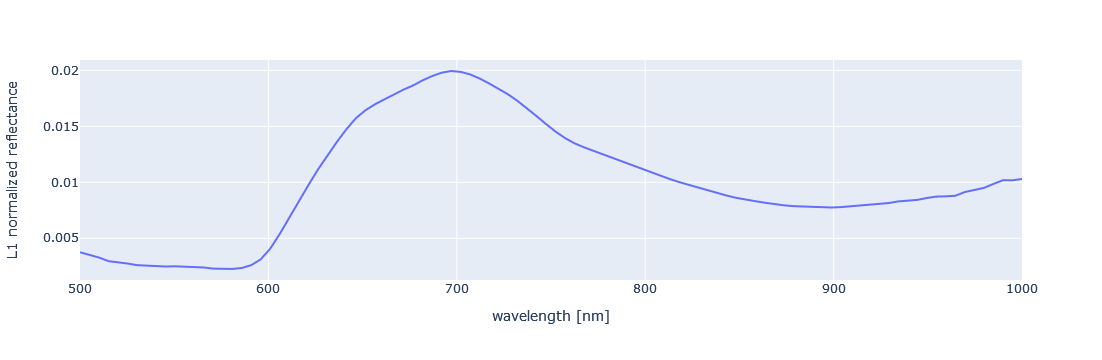

In [29]:
# Plot the result
fig = px.line(x=tivita_wavelengths(), y=colon_median_spectrum)
fig.update_layout(xaxis_title="wavelength [nm]", yaxis_title="L1 normalized reflectance")